In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import osmnx as ox
from datetime import datetime

In [2]:
loc = pd.read_csv('/Users/itto/Downloads/carris_data/csv_files/CARRIS_Paragens.csv', sep=';')

In [3]:
points = list(zip(loc.Longitude,loc.Latitude))
points = [Point(long,lat) for long,lat in points]

loc = gpd.GeoDataFrame(loc)

loc['geometry'] = points

loc.crs = {'init': 'epsg:4326', 'no_defs': True}

loc = loc.to_crs(epsg=32630)

In [4]:
shp_lisbon = ox.gdf_from_place('Lisbon',which_result=2)

In [5]:
shp_lisbon = shp_lisbon.to_crs(epsg=32630)

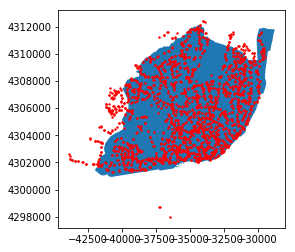

In [6]:
ax = shp_lisbon.plot()
loc.plot(ax=ax, color='r', markersize=2)

In [8]:
df = pd.read_csv('/Users/itto/Downloads/carris_data/csv_files/CARRIS_Amostra.csv', sep=';', low_memory=False)

In [9]:
df.Time_Stamp = pd.to_datetime(df.Time_Stamp, format = '%m/%d/%y %H:%M:%S')

In [55]:
df

,Time_Stamp,Nr_Frota,Carreira,Variante,Nr_Chapa,Nr_Viagem,Sentido,Paragem,Nr_Serie,Descrição,Cod Titulo,IDParagem,Designação
0,2018-03-15 15:46:04,1582,728,0,4,7,ASC,19,2467297306,Navegante Urbano Normal,30720,3803,Cais Sodré
1,2018-03-15 17:32:33,1582,728,0,4,8,DESC,36,2466604279,Navegante Urbano Normal,30720,3802,Cais Sodré
2,2018-03-15 19:08:14,1582,728,0,4,9,ASC,45,2015979630,Navegante Urbano Normal,30720,7803,Olivais Velho - Av. Inf. D. Henrique
3,2018-03-15 18:57:46,1582,728,0,4,9,ASC,40,2461801667,Navegante Urbano Normal,30720,2411,Passeio Adamastor
4,2018-03-15 16:12:46,1582,728,0,4,7,ASC,39,2015949600,Navegante Urbano Normal,30720,2410,Parque Nações Sul
5,2018-03-15 16:12:55,1582,728,0,4,7,ASC,39,2016716849,Navegante Urbano Normal,30720,2410,Parque Nações Sul
6,2018-03-15 18:43:22,1582,728,0,4,9,ASC,28,2463622536,Navegante Urbano Normal,30720,9809,Av. Inf. D. Henrique (Ponte Xabregas)
7,2018-03-15 15:51:49,1582,728,0,4,7,ASC,21,2463917779,Navegante Urbano Normal,30720,5501,Pç. Comércio
8,2018-03-15 15:49:30,1582,728,0,4,7,ASC,20,2467603902,Navegante Urbano Normal,30720,3824,Corpo Santo
9,2018-03-15 16:11:01,1582,728,0,4,7,ASC,37,2467705405,Navegante Urbano Normal,30720,2204,Matinha


In [126]:
interval = 15
data_en = df.groupby([pd.Grouper(key='Time_Stamp',freq=str(interval) + 'T'),'Designação']).Paragem.size().unstack()
data_en = data_en.groupby([data_en.index.hour, data_en.index.minute]).sum()/5
data_en.index = range(int(24/(interval/60)))

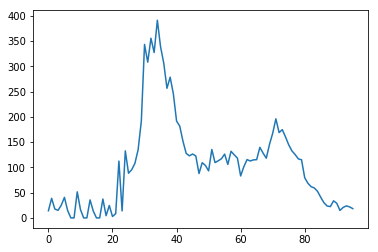

In [127]:
data_en['Cais Sodré'].plot()

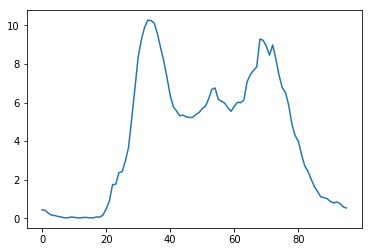

In [121]:
data_en.mean(axis=1).plot()

In [118]:
df.shape

(1890780, 13)

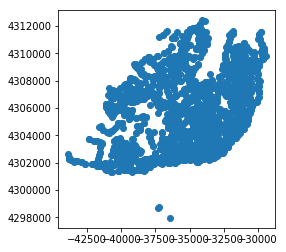